### The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


### IMPORTING NECESSARY LIBRARIES

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier 

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

### IMPORTING DATASET

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA

In [3]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [4]:
df.shape

(907, 27)

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
# Value counts for every feature to check the missing again or unique values
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')


IND    907
Name: country, dtype: int64
**********************************
India    907
Name: country_long, dtype: int64
**********************************
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
**********************************
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
**********************************
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
***********

In [7]:
df= df.drop(['country_long','name','gppd_idnr','latitude','longitude','other_fuel2','other_fuel3','owner','url','geolocation_source','wepp_id','generation_gwh_2013','generation_gwh_2019','source','estimated_generation_gwh','name','owner','generation_data_source','year_of_capacity_data'], axis =1)


In [8]:
df.isnull().sum()

country                  0
capacity_mw              0
primary_fuel             0
other_fuel1            709
commissioning_year     380
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [9]:
#filling missing values with mode.

df['other_fuel1'].fillna(df['other_fuel1'].mode()[0], inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mode()[0], inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mode()[0], inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mode()[0], inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mode()[0], inplace=True)


In [10]:
df.isnull().sum()

country                0
capacity_mw            0
primary_fuel           0
other_fuel1            0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [11]:
df.dtypes

country                 object
capacity_mw            float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

### UNIVARIATE ANALYSIS

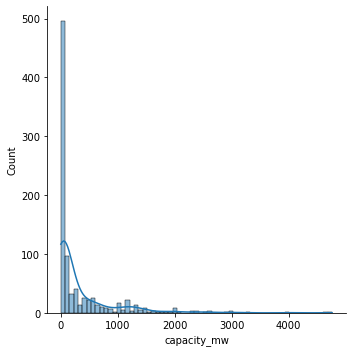

In [12]:
# Distribution of the target variable
sns.displot(df['capacity_mw'], kde=True)
plt.show()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

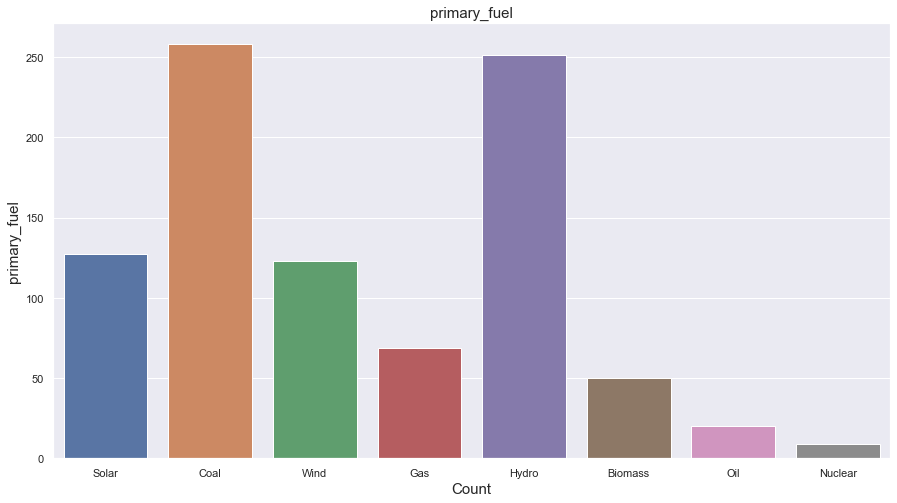

In [13]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(df['primary_fuel'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('primary_fuel', fontsize=15)

df['primary_fuel'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

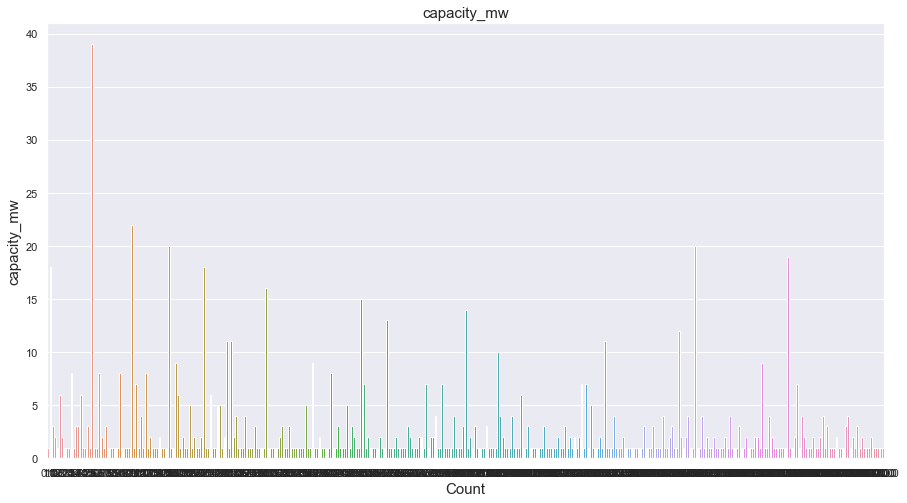

In [14]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(df['capacity_mw'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('capacity_mw', fontsize=15 )
plt.title('capacity_mw', fontsize=15)

df['capacity_mw'].value_counts()

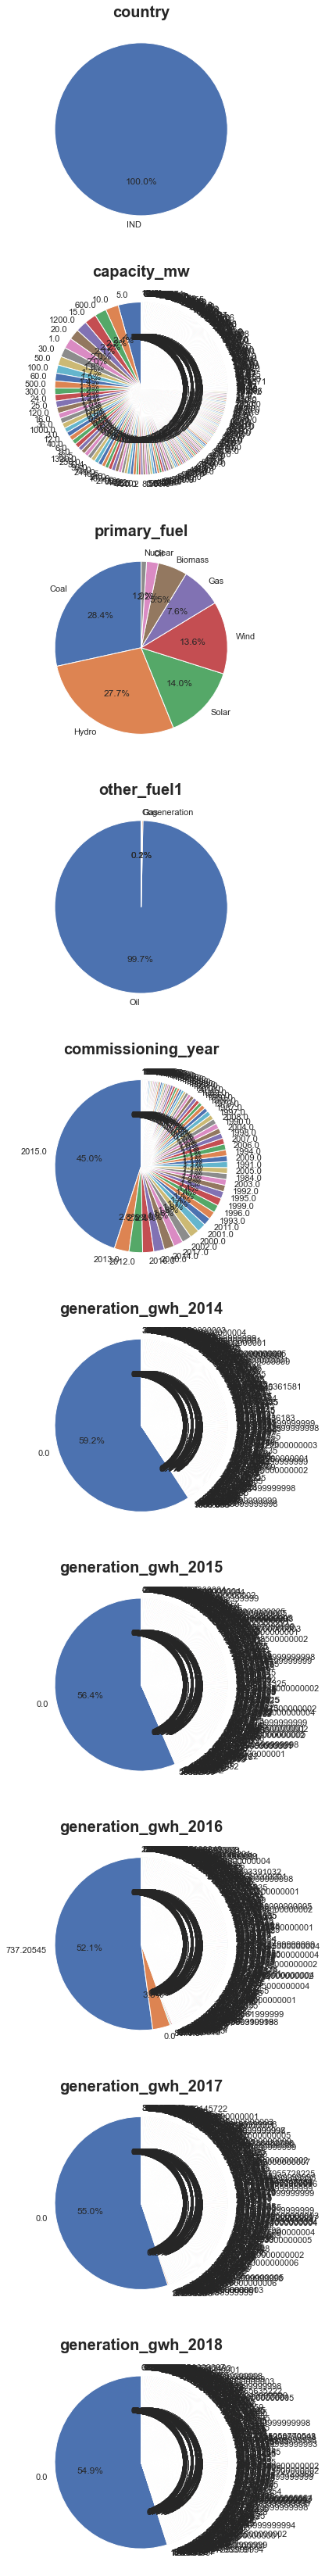

In [16]:
# Count the number of occurrences of each unique value in each column
value_counts = [df[column].value_counts() for column in df.columns]

# Create a figure with subplots for each column
fig, axs = plt.subplots(nrows=len(df.columns), figsize=(8, 6*len(df.columns)))

# Plot a pie chart for each column
for i, (column, vc) in enumerate(zip(df.columns, value_counts)):
    axs[i].pie(vc, labels=vc.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(column, fontsize=20, fontweight='bold')

plt.show()

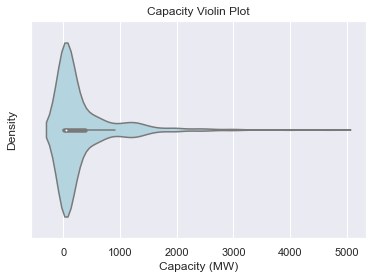

In [17]:
sns.violinplot(x=df['capacity_mw'], color='lightblue')

# set plot title and axis labels
plt.title('Capacity Violin Plot')
plt.xlabel('Capacity (MW)')
plt.ylabel('Density')

# display the plot
plt.show()

### BIVARIATE ANALYSIS

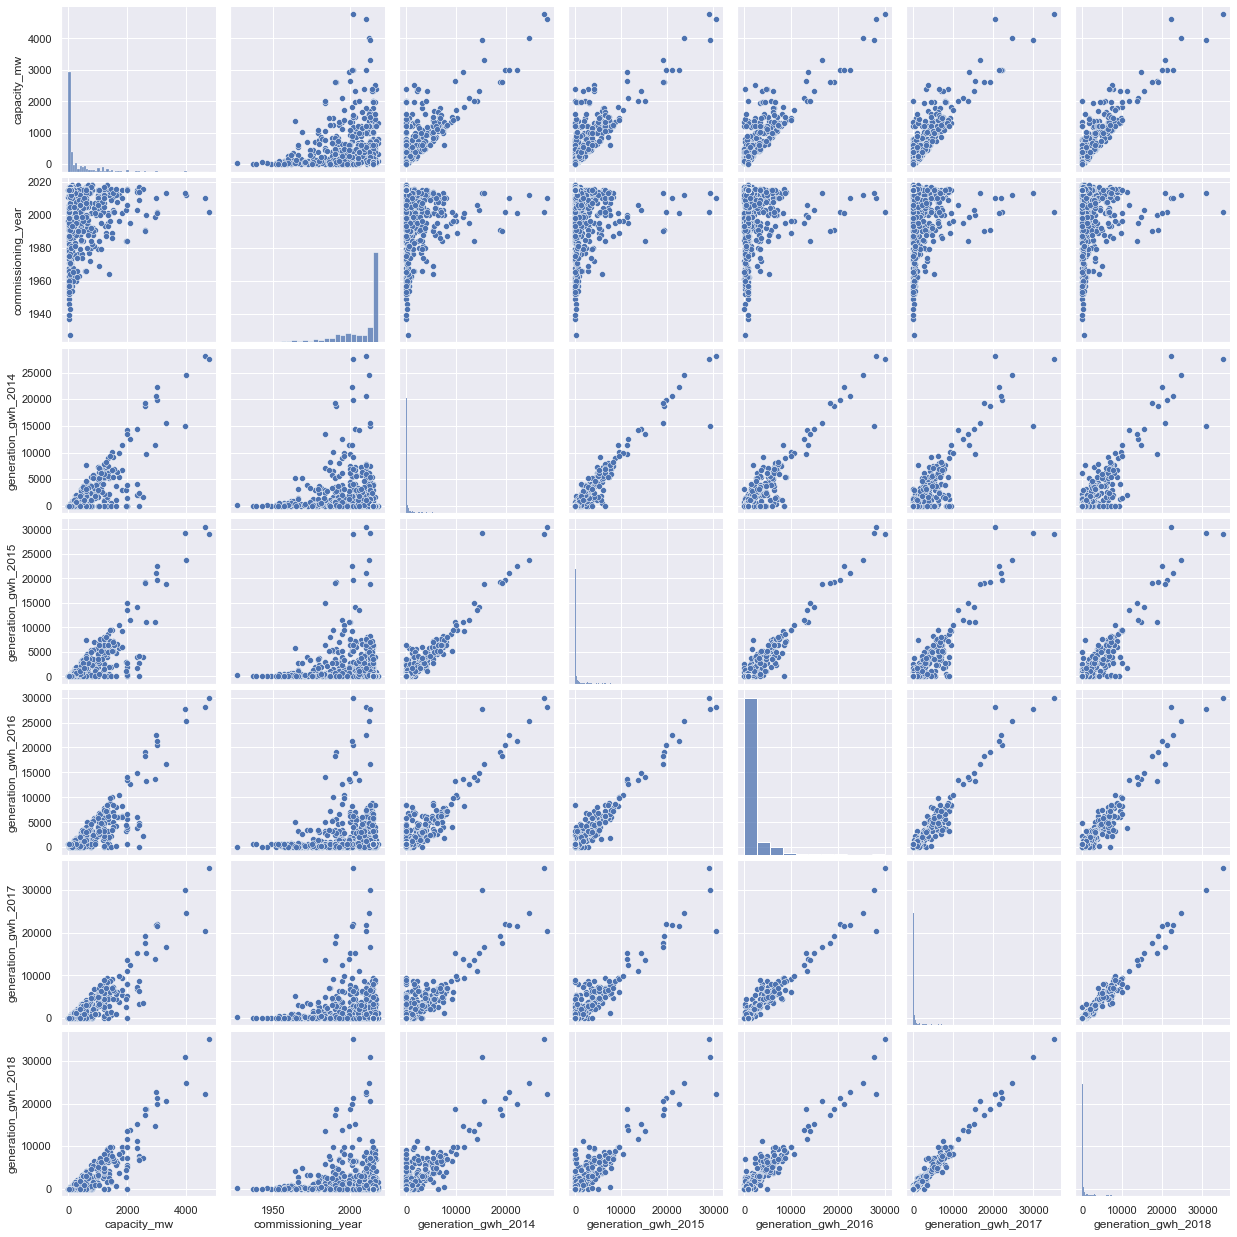

In [18]:
sns.pairplot(df)
plt.show()

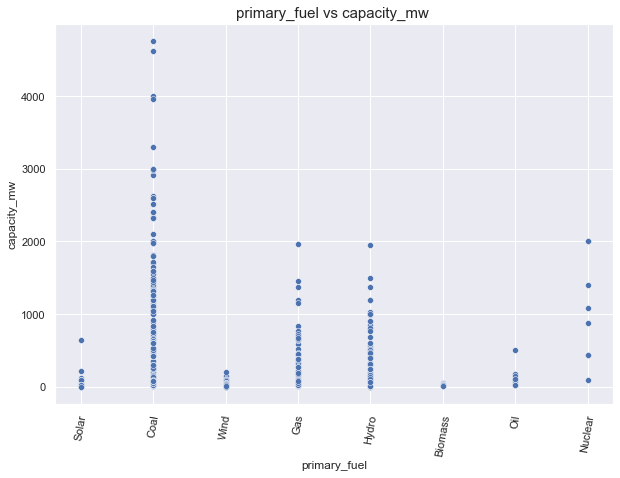

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


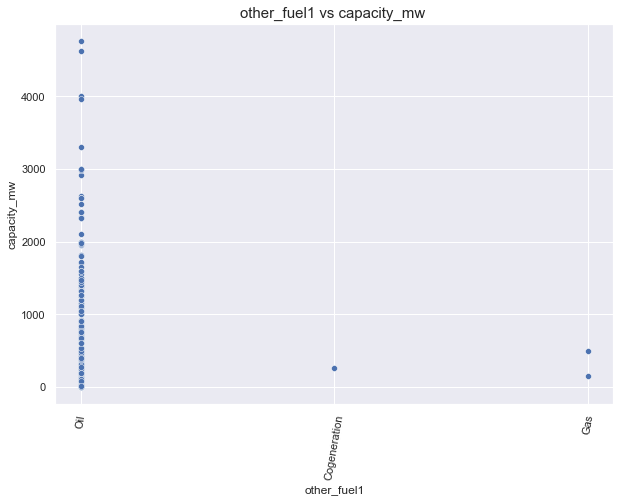

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='other_fuel1',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('other_fuel1 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()


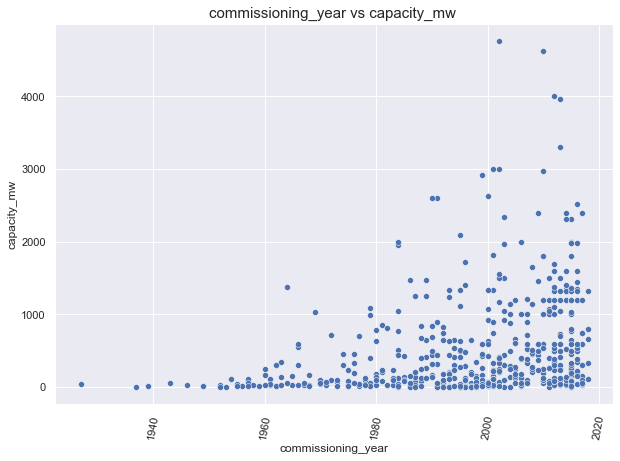

In [21]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

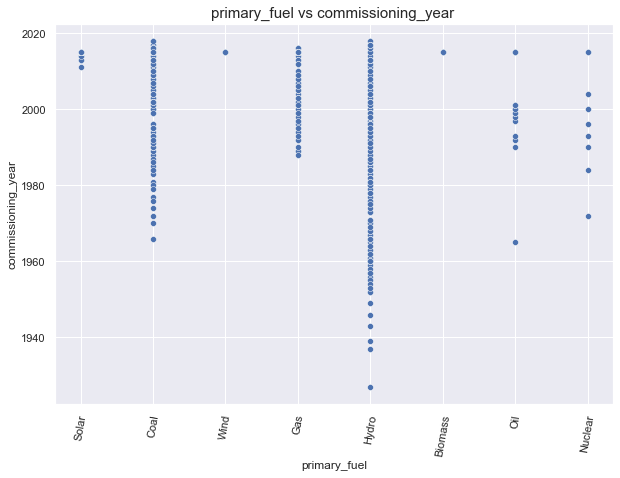

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='primary_fuel',y='commissioning_year')
locs, labels = plt.xticks()
plt.title('primary_fuel vs commissioning_year ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

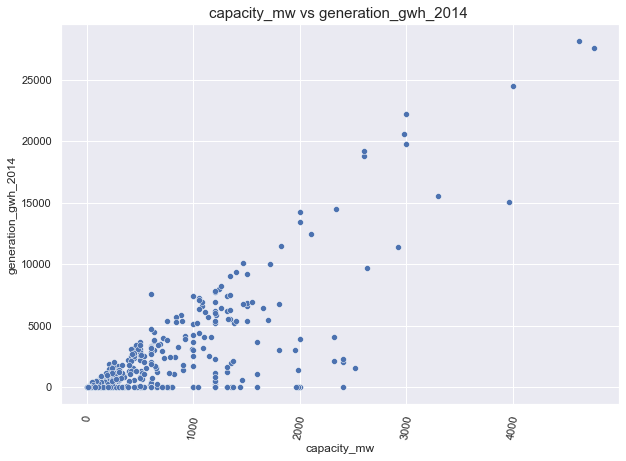

In [23]:

plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='capacity_mw',y='generation_gwh_2014')
locs, labels = plt.xticks()
plt.title('capacity_mw vs generation_gwh_2014 ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

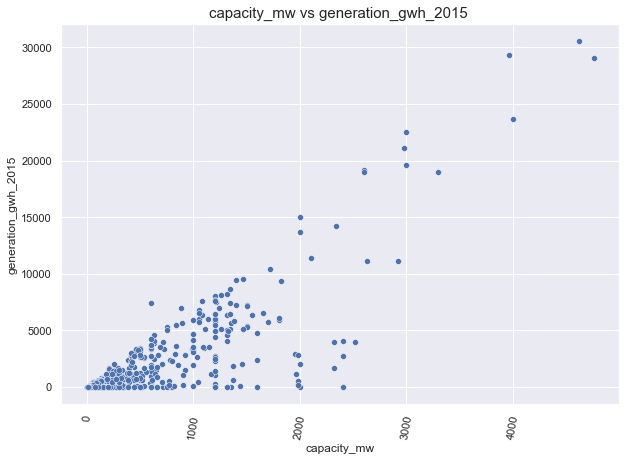

In [24]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='capacity_mw',y='generation_gwh_2015')
locs, labels = plt.xticks()
plt.title('capacity_mw vs generation_gwh_2015 ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

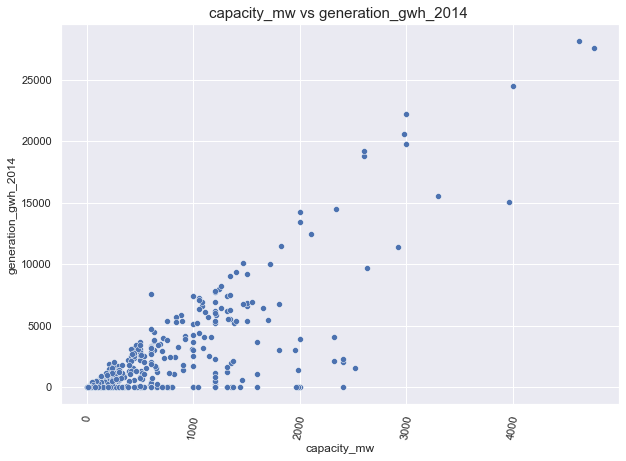

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='capacity_mw',y='generation_gwh_2014')
locs, labels = plt.xticks()
plt.title('capacity_mw vs generation_gwh_2014 ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

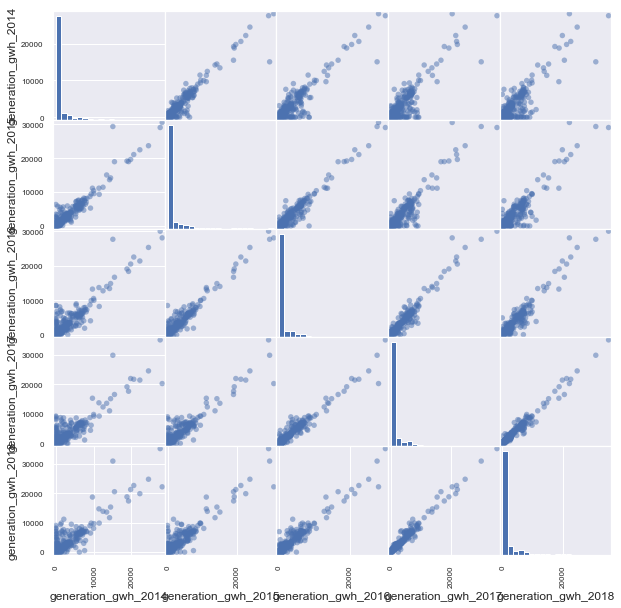

In [26]:
columns = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
pd.plotting.scatter_matrix(df[columns], figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, s=30, alpha=.5)


# show the plot
plt.show()

In [27]:
df.drop(['commissioning_year'], axis=1, inplace= True)

<AxesSubplot:>

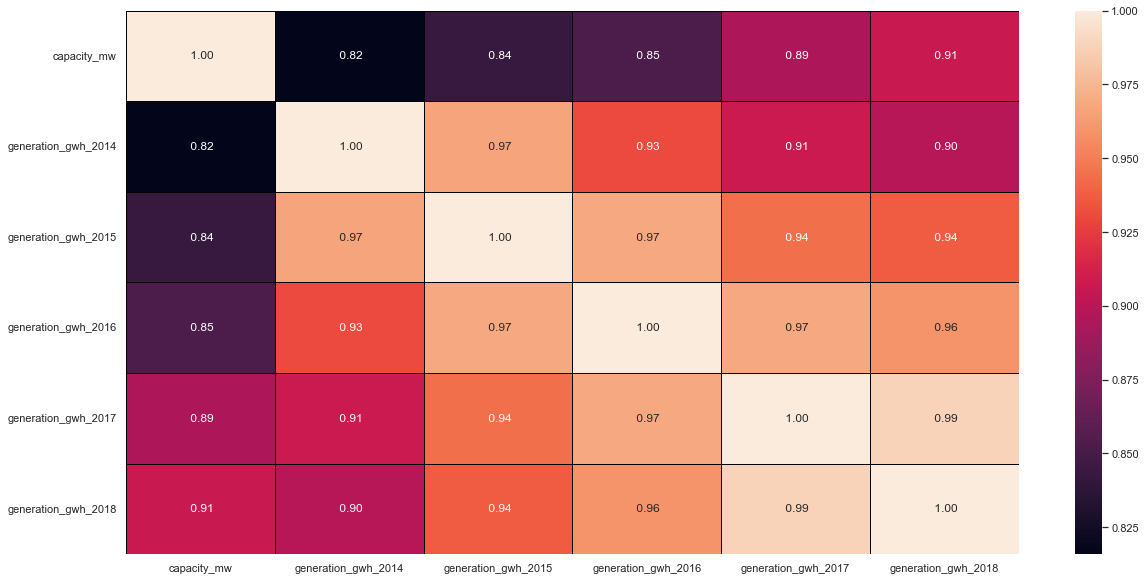

In [28]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

### OUTLIERS

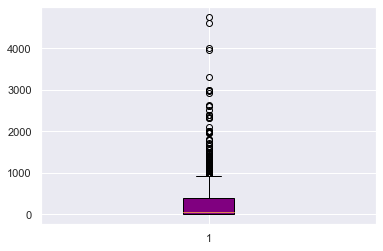

In [30]:
plt.boxplot(df['capacity_mw'], patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.show()

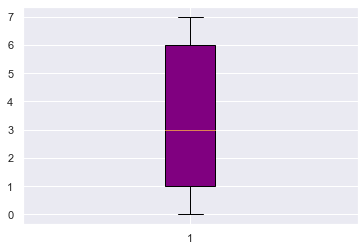

In [31]:
plt.boxplot(df['primary_fuel'], patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.show()

In [32]:
df.columns

Index(['country', 'capacity_mw', 'primary_fuel', 'other_fuel1',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

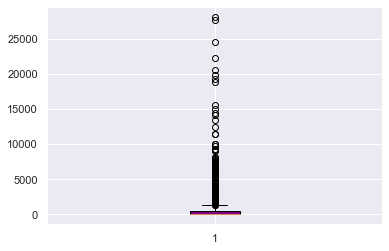

In [33]:
plt.boxplot(df['generation_gwh_2014'], patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.show()

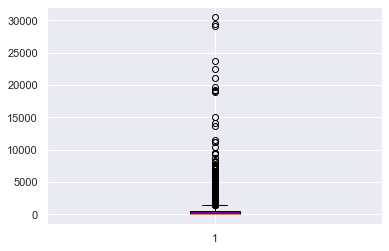

In [34]:
plt.boxplot(df['generation_gwh_2015'], patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.show()

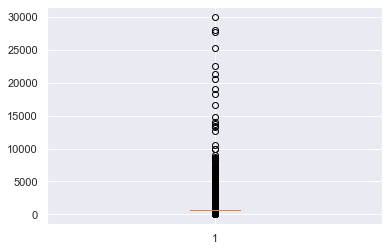

In [35]:
plt.boxplot(df['generation_gwh_2016'], patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.show()

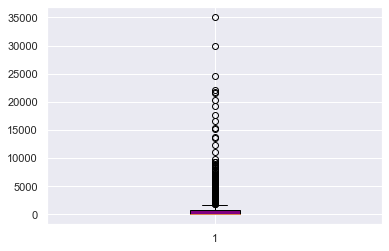

In [36]:
plt.boxplot(df['generation_gwh_2017'], patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.show()

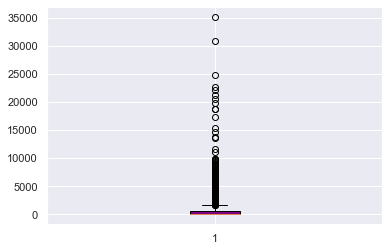

In [37]:
plt.boxplot(df['generation_gwh_2018'], patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.show()

In [40]:
dfn =df.drop(["country"],axis=1)

In [41]:
dfn.dtypes

capacity_mw            float64
primary_fuel             int32
other_fuel1             object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [46]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
dfn['other_fuel1']=le.fit_transform(dfn['other_fuel1'])

In [47]:
dfn.dtypes

capacity_mw            float64
primary_fuel             int32
other_fuel1              int64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

### REMOVING OUTLIERS

In [48]:
from scipy.stats import zscore
z= np.abs(zscore(dfn))
threshold= 3 
print(np.where(z>3))
dfn

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 209, 308, 308, 308, 308, 308, 308, 363,
       364, 364, 364, 364, 364, 364, 375, 482, 482, 493, 493, 493, 493,
       493, 493, 494, 494, 494, 494, 494, 494, 532, 623, 648, 648, 648,
       648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695,
       695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786, 788,
       808, 808, 808, 808, 808, 808, 811, 813, 817, 880, 880, 880, 880,
       880, 880], dtype=int64), array([0, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 3, 0, 3, 4, 5, 6, 7, 0, 3, 4,
       5, 6, 7, 0, 0, 3, 4, 5, 6, 7, 0, 0, 7, 0, 3, 4, 5, 6, 7, 0, 3, 4,
       5, 6, 7, 3, 3, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6,
       7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 0, 3, 4, 5,
       6, 7, 0, 0, 3, 4, 5, 6, 7, 2, 2, 2, 0, 3, 4, 5, 6, 7], dtype=int64))


,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,6,2,0.000000,0.000000,737.205450,0.000000,0.000000
1,98.0,1,2,0.000000,0.000000,737.205450,0.000000,0.000000
2,39.2,7,2,0.000000,0.000000,737.205450,0.000000,0.000000
3,135.0,2,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...
902,1600.0,1,2,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,6,2,0.000000,0.000000,737.205450,0.000000,0.000000
904,25.5,7,2,0.000000,0.000000,737.205450,0.000000,0.000000
905,80.0,1,2,0.000000,0.000000,737.205450,0.000000,0.000000


In [53]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=dfn.drop(['capacity_mw'], axis=1)
y=dfn.iloc[:,0]

x=power_transform(x, method='yeo-johnson')

In [54]:
X=pd.DataFrame(data=x)


In [55]:
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
X=SDc.fit_transform(X)

### LinearRegression

In [67]:
lg=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.30)
    lg.fit(x_train,y_train)
    pred_train= lg.predict(x_train)
    pred_test= lg.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Testing r2 score ",r2_score(y_test,pred_test)*100)

At Random state 597 The model perform very well
At random State: 597
Training r2_score 58.178188155050705
Testing r2 score  58.222940637347364
At Random state 795 The model perform very well
At random State: 795
Training r2_score 57.83388566347316
Testing r2 score  57.76754678424826
At Random state 815 The model perform very well
At random State: 815
Training r2_score 58.03300376719112
Testing r2 score  58.04442552874918
At Random state 884 The model perform very well
At random State: 884
Training r2_score 57.81923260986675
Testing r2 score  57.76873926203443


At Random state 597

Training r2_score 58.178188155050705

Testing r2 score  58.222940637347364


In [69]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 597)

In [70]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.5822294063734736


### Cross Validation of Model

In [71]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 53.50390564489069 and Accuracy score is 58.222940637347364
At cross fold 3 the Cross Val score is 53.6461889235181 and Accuracy score is 58.222940637347364
At cross fold 4 the Cross Val score is 53.610318771470645 and Accuracy score is 58.222940637347364
At cross fold 5 the Cross Val score is 55.8113770530215 and Accuracy score is 58.222940637347364
At cross fold 6 the Cross Val score is 53.80375860621422 and Accuracy score is 58.222940637347364
At cross fold 7 the Cross Val score is 54.78079088078436 and Accuracy score is 58.222940637347364
At cross fold 8 the Cross Val score is 55.952130648233236 and Accuracy score is 58.222940637347364
At cross fold 9 the Cross Val score is 43.64683341025383 and Accuracy score is 58.222940637347364


At cross fold 7 the Cross Val score is 54.78079088078436  and Accuracy score is 0.5822294063734736

### Lasso

In [72]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=8,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: 58.28848663235038
Cross val Score : 55.97464327885475


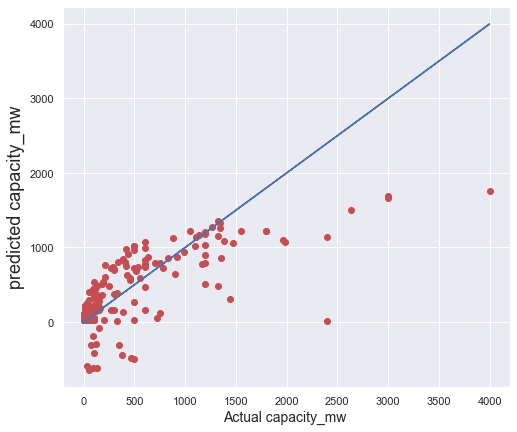

In [73]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

###  Ridge

In [76]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=8, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  58.25711749767659
Cross val Score 55.95466021247304


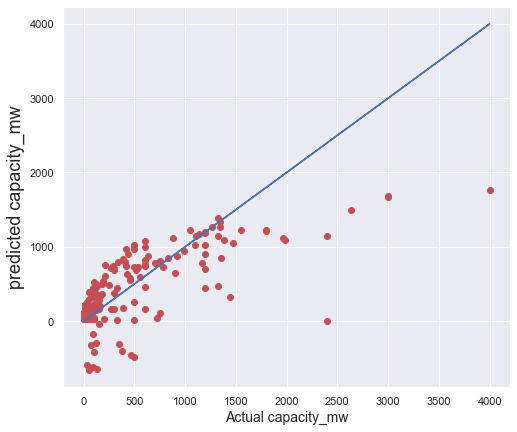

In [77]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

### Decision TreeRegressor

In [78]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=8, scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 83.00881271265408
Cross Val Score: 74.56498092600609


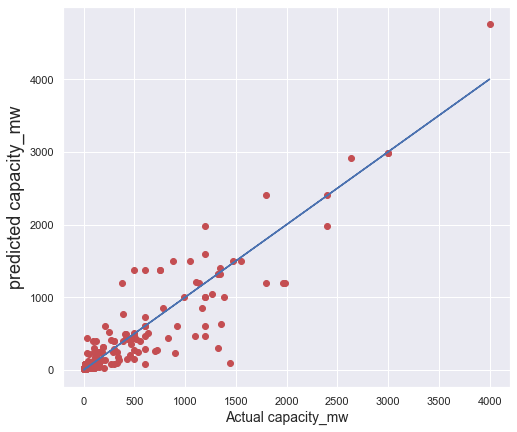

In [79]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

### KNeighborsRegressor

In [82]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=8, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 85.01223647724537
Cross val Score : 81.08534743628704


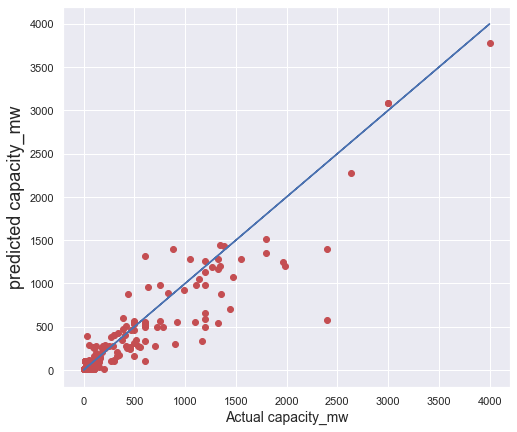

In [83]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

 ### HyperParameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse', 'absolute_error','squared_error','poisson'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[100,200,300,400,500], 'min_samples_split':[1,2,3,4,10]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'poisson', 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 500}


In [87]:
rf=RandomForestRegressor(criterion='poisson', max_features='sqrt', min_samples_split=2, n_estimators=300)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100)

R2 score: 90.05446931143013
Cross val Score : 87.59155304219641


We can see RandomForestRegressor Having very less diffrence in R2 score and Cross Val Score. we can consider this our best model.

### Saving Best Model

In [88]:
import pickle
filename='Evaluation_Project-Global_Power_Plant_Database_regression.pkl'
pickle.dump(rf,open(filename,'wb'))

In [89]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,5.0,25.583708
1,750.0,831.719333
2,180.0,194.871533
3,120.0,112.953233
4,10.5,30.881248
...,...,...
268,120.0,69.577833
269,22.5,30.881248
270,1140.0,1179.675000
271,30.0,20.129037


### Lets predict the primary fuel

In [92]:
# deviding into fetures and target. 
x=dfn.drop('primary_fuel', axis=1)
y=dfn['primary_fuel']

In [93]:
from sklearn.preprocessing import power_transform 
x=power_transform(x, method='yeo-johnson')
X2=pd.DataFrame(data=x)

### Scaling the data Using StandardScaler.

In [94]:
SDc=StandardScaler()
X2=SDc.fit_transform(X2)

In [95]:
X2

array([[-1.69576688,  0.05760715, -0.81380861, ..., -0.05021518,
        -0.87813097, -0.88378789],
       [ 0.19369368,  0.05760715, -0.81380861, ..., -0.05021518,
        -0.87813097, -0.88378789],
       [-0.2923371 ,  0.05760715, -0.81380861, ..., -0.05021518,
        -0.87813097, -0.88378789],
       ...,
       [-0.52277344,  0.05760715, -0.81380861, ..., -0.05021518,
        -0.87813097, -0.88378789],
       [ 0.08691496,  0.05760715, -0.81380861, ..., -0.05021518,
        -0.87813097, -0.88378789],
       [-0.75589054,  0.05760715, -0.81380861, ..., -0.05021518,
        -0.87813097, -0.88378789]])

In [99]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  20 The Model performing Well
At Random State 20
Training Accuracy score is- 53.79310344827586
Testing Accuracy Score is- 53.84615384615385
At Random state  201 The Model performing Well
At Random State 201
Training Accuracy score is- 53.79310344827586
Testing Accuracy Score is- 53.84615384615385
At Random state  203 The Model performing Well
At Random State 203
Training Accuracy score is- 53.79310344827586
Testing Accuracy Score is- 53.84615384615385
At Random state  209 The Model performing Well
At Random State 209
Training Accuracy score is- 53.79310344827586
Testing Accuracy Score is- 53.84615384615385
At Random state  253 The Model performing Well
At Random State 253
Training Accuracy score is- 52.689655172413794
Testing Accuracy Score is- 52.74725274725275
At Random state  534 The Model performing Well
At Random State 534
Training Accuracy score is- 53.79310344827586
Testing Accuracy Score is- 53.84615384615385


At Random state  209 The Model performing Well
At Random State 209
Training Accuracy score is- 53.79310344827586
Testing Accuracy Score is- 53.84615384615385

In [100]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=5,test_size=0.20)

In [101]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))


0.5384615384615384


In [102]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[ 0  0  0  0  0  0  0 14]
 [ 0 35  2  6  0  1  1  7]
 [ 0  2  2  5  0  0  0  0]
 [ 0  9  0 31  0  0  5  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  2  0  1  0  1]
 [ 0  2  0  0  0  0 17 11]
 [ 0  6  0  0  0  0  8 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.62      0.67      0.65        52
           2       0.50      0.22      0.31         9
           3       0.70      0.69      0.70        45
           4       0.00      0.00      0.00         1
           5       0.50      0.20      0.29         5
           6       0.55      0.57      0.56        30
           7       0.27      0.46      0.34        26

    accuracy                           0.54       182
   macro avg       0.39      0.35      0.35       182
weighted avg       0.52      0.54      0.52       182



### SVC

In [103]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=8, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 56.59340659340659
Cross val Score : 53.57669616519174


In [104]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[ 0  0  0  0  0  0  0 14]
 [ 0 36  3  4  0  0  1  8]
 [ 0  3  0  5  0  0  0  1]
 [ 0  7  0 33  0  0  4  1]
 [ 0  1  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  2]
 [ 0  0  0  0  0  0 17 13]
 [ 0  1  0  0  0  0  8 17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.71      0.69      0.70        52
           2       0.00      0.00      0.00         9
           3       0.79      0.73      0.76        45
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.57      0.57      0.57        30
           7       0.30      0.65      0.41        26

    accuracy                           0.57       182
   macro avg       0.30      0.33      0.30       182
weighted avg       0.53      0.57      0.54       182



### KNeighborsClassifier

In [105]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=8, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 58.24175824175825
Cross val Score : 55.90455674584691


In [106]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[ 3  3  0  1  0  1  0  6]
 [ 1 38  5  4  0  0  2  2]
 [ 0  3  1  4  0  1  0  0]
 [ 0  7  2 35  0  0  1  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  3  0  0  0  2  0  0]
 [ 1  5  0  3  0  1 19  1]
 [ 1  7  2  6  0  1  1  8]]
              precision    recall  f1-score   support

           0       0.50      0.21      0.30        14
           1       0.57      0.73      0.64        52
           2       0.10      0.11      0.11         9
           3       0.66      0.78      0.71        45
           4       0.00      0.00      0.00         1
           5       0.33      0.40      0.36         5
           6       0.83      0.63      0.72        30
           7       0.47      0.31      0.37        26

    accuracy                           0.58       182
   macro avg       0.43      0.40      0.40       182
weighted avg       0.58      0.58      0.57       182



### DecisionTreeClassifier

In [107]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=8, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 53.2967032967033
Cross val score is: 56.46735755317498


In [109]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[ 6  1  0  2  0  0  3  2]
 [ 0 30  5  8  3  0  6  0]
 [ 0  1  1  6  1  0  0  0]
 [ 0  3 10 31  0  0  1  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  1  0  0  0  2  0  1]
 [ 2  4  0  3  0  0 20  1]
 [ 1  6  2  6  0  2  2  7]]
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        14
           1       0.64      0.58      0.61        52
           2       0.06      0.11      0.07         9
           3       0.55      0.69      0.61        45
           4       0.00      0.00      0.00         1
           5       0.50      0.40      0.44         5
           6       0.62      0.67      0.65        30
           7       0.64      0.27      0.38        26

    accuracy                           0.53       182
   macro avg       0.45      0.39      0.41       182
weighted avg       0.58      0.53      0.54       182



### RandomForestClassifier

In [110]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  58.24175824175825
Cross val Score : 58.55554261760596


In [111]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[ 4  0  0  3  0  1  4  2]
 [ 0 34  7  5  0  0  6  0]
 [ 0  3  1  4  1  0  0  0]
 [ 0  4  5 35  0  0  1  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  3  0  1]
 [ 1  0  0  3  0  1 22  3]
 [ 1  6  2  6  0  2  2  7]]
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        14
           1       0.69      0.65      0.67        52
           2       0.07      0.11      0.08         9
           3       0.62      0.78      0.69        45
           4       0.00      0.00      0.00         1
           5       0.43      0.60      0.50         5
           6       0.63      0.73      0.68        30
           7       0.54      0.27      0.36        26

    accuracy                           0.58       182
   macro avg       0.46      0.43      0.42       182
weighted avg       0.60      0.58      0.58       182



### AdaBoostClassifier

In [114]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=8, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  30.76923076923077
Cross val Score : 40.13157894736842


In [115]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[ 0  0  0 14  0  0  0  0]
 [ 0  8  0 42  0  2  0  0]
 [ 0  0  0  8  0  1  0  0]
 [ 0  0  0 45  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  2  0  3  0  0]
 [ 0  0  0 30  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       1.00      0.15      0.27        52
           2       0.00      0.00      0.00         9
           3       0.27      1.00      0.42        45
           4       0.00      0.00      0.00         1
           5       0.50      0.60      0.55         5
           6       0.00      0.00      0.00        30
           7       0.00      0.00      0.00        26

    accuracy                           0.31       182
   macro avg       0.22      0.22      0.15       182
weighted avg       0.37      0.31      0.20       182



### GaussianNB

In [116]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=8, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 53.2967032967033
Cross Val Score is : 41.013623660922214


### Hyperparameter Tuning of the model

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100, 300,400, 500, 800, 1200], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}


In [118]:
rf=RandomForestClassifier(criterion='entropy',max_depth=25, max_features='sqrt', min_samples_split=5, n_estimators=1200 )
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  58.791208791208796
Cross val Score : 58.88546033224655


We can see RandomForestRegressor Having very less diffrence in R2 score and Cross Val Score. we can consider this our best model

In [120]:
import pickle
filename="Evaluation_Project-Global_Power_Plant_Database_logic.pkl "
pickle.dump(dt, open(filename,'wb'))

In [122]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,3,3
1,2,2
2,3,3
3,3,3
4,6,6
...,...,...
177,0,1
178,7,7
179,1,1
180,1,1
